In [1]:
import cv2
import math
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from google.colab import drive
import os
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
print(tf.__version__)
drive.mount('/content/gdrive')

2.6.0
Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/Humans.zip

Archive:  /content/gdrive/MyDrive/Humans.zip
   creating: Humans/
  inflating: Humans/animal.jpg       
  inflating: Humans/animal_1.jpg     
  inflating: Humans/animal_10.jpg    
  inflating: Humans/animal_11.jpg    
  inflating: Humans/animal_12.jpg    
  inflating: Humans/animal_3.jpg     
  inflating: Humans/animal_4.jpg     
  inflating: Humans/animal_5.jpg     
  inflating: Humans/animal_6.jpg     
  inflating: Humans/animal_7.jpg     
  inflating: Humans/animal_8.jpg     
  inflating: Humans/animal_9.jpg     
  inflating: Humans/baxter3_1.jpg    
 extracting: Humans/baxter_1.jpg     
  inflating: Humans/cpu_0.jpg        
  inflating: Humans/cpu_1.jpg        
  inflating: Humans/cpu_2.jpg        
  inflating: Humans/cpu_3.jpg        
  inflating: Humans/cpu_4.jpg        
  inflating: Humans/cpu_5.jpg        
  inflating: Humans/desktop_0.jpg    
  inflating: Humans/desktop_1.jpg    
  inflating: Humans/desktop_3.jpg    
  inflating: Humans/desktop_5.jpg    
  inflating: Humans/dr

In [3]:
files=os.listdir("Humans")
!ls
img_arr=[]
categories = []
count1=0
for file in files:
    category = file.split('_')[0]
    if category == 'human':
        count1+=1
        categories.append(str(1))
    else:
        categories.append(str(0))
    img=cv2.imread('Humans/'+file)
    img = cv2.resize(img, (224,224))
    img_arr.append(img)
print(count1)

gdrive	Humans	sample_data
369


In [4]:
def plot_cnn_images(image_set, orig, pred=None):
    assert len(image_set) == len(orig) == 25
    x=[]
    y=[]
    # Creating figure with 4x4 sub-plots.
    fig, axes = plt.subplots(5, 5)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(image_set[i], cmap='binary')

        # Show true and predicted classes.
        if pred is None:
            xlabel = "Label: {0}".format(orig[i])
        else:
            #print('h',orig[i],'i')
            if orig[i]=='1':
              #print('human')
              x="hum"
            if orig[i]=='0':
              #print('human')
              x="non"
            if pred[i]==[1]:
              #print('human')
              y="hum"
            if pred[i]==[0]:
              #print('human')
              y="non"
            #print(x,y)
            xlabel = "Lab: {0}, Pred: {1}".format(x, y)
            x,y=[],[]
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel,fontsize=7)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    fig.tight_layout(pad=0.7)
    plt.show()

#print(categories)
#print(img_arr)

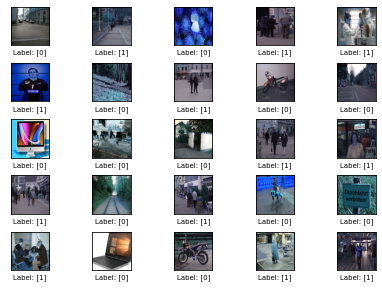

In [5]:
train_imgs, test_set, train_labels, test_labels = train_test_split(img_arr, categories, test_size = .2, random_state = 42)
#train_imgs, val_imgs, train_labels, val_labels = train_test_split(train_imgs, train_labels, test_size = .2, random_state = 42)

label_bin = LabelBinarizer().fit(train_labels)
y_train = label_bin.transform(train_labels)
y_test = label_bin.transform(test_labels)

plot_cnn_images(train_imgs[0:25], y_train[0:25])

img_shape_full = train_imgs[0].shape
img_size = img_shape_full[0]
img_size_flat = len(train_imgs[0].ravel())
img_shape = img_shape_full[:2]
num_classes = 2
num_channels = img_shape_full[-1]


In [6]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=img_shape_full),                                 
    keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv1'),
    keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv2'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    #keras.layers.Dropout(0.3),

    keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv1'),
    keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv2'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    #keras.layers.Dropout(0.3),

    keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv1'),
    keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv2'),
    keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv3'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    #keras.layers.Dropout(0.3),

    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv1'),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv2'),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv3'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=3, strides=3),
  
    keras.layers.Conv2D(filters=1024,kernel_size=3, activation="relu", padding="same", name='layer5_conv1'),
    keras.layers.Conv2D(filters=1024,kernel_size=3, activation="relu", padding="same", name='layer5_conv2'),
    keras.layers.Conv2D(filters=1024,kernel_size=3, activation="relu", padding="same", name='layer5_conv3'),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=3, strides=3),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')   
  ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
layer1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
layer2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
layer2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
layer3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [7]:
optimizer = tf.keras.optimizers.Adam(lr=1e-5)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
history = model.fit(x=np.array(train_imgs), 
        y=y_train,validation_split=0.1,
        epochs=20, batch_size=40)

Epoch 1/20
13/13 [==============================] - 30s 749ms/step - loss: 0.7064 - accuracy: 0.5198 - val_loss: 0.6676 - val_accuracy: 0.6667
Epoch 2/20
13/13 [==============================] - 4s 298ms/step - loss: 0.6685 - accuracy: 0.6210 - val_loss: 0.6634 - val_accuracy: 0.6140
Epoch 3/20
13/13 [==============================] - 4s 298ms/step - loss: 0.6369 - accuracy: 0.6369 - val_loss: 0.6471 - val_accuracy: 0.6316
Epoch 4/20
13/13 [==============================] - 4s 298ms/step - loss: 0.5670 - accuracy: 0.7242 - val_loss: 0.6187 - val_accuracy: 0.6842
Epoch 5/20
13/13 [==============================] - 4s 298ms/step - loss: 0.5079 - accuracy: 0.7579 - val_loss: 0.6130 - val_accuracy: 0.7018
Epoch 6/20
13/13 [==============================] - 4s 298ms/step - loss: 0.4730 - accuracy: 0.8016 - val_loss: 0.6045 - val_accuracy: 0.7018
Epoch 7/20
13/13 [==============================] - 4s 297ms/step - loss: 0.4078 - accuracy: 0.8175 - val_loss: 0.5191 - val_accuracy: 0.7368
Epoch

KeyboardInterrupt: ignored

In [9]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

NameError: ignored

18/18 [==============================] - 1s 66ms/step - loss: 0.0915 - accuracy: 0.9750
Testing Accuracy: 0.8156028389930725 
 Training Accuracy: 0.9750445485115051


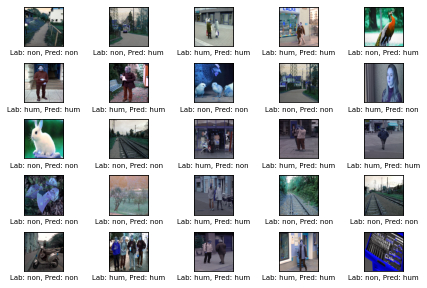

In [16]:
def plot_test_predict(image_set,pred,test_orig):
     plot_cnn_images(images=image_set,
                 test_orig=test_orig,
                 pred=pred)

loss,accuracy = model.evaluate(x=np.array(test_set), y=y_test)
loss1,accuracy1 = model.evaluate(x=np.array(train_imgs), y=y_train)
print('Testing Accuracy:',accuracy,'\n','Training Accuracy:',accuracy1)
pred = model.predict(np.array(test_set))
test_pred = np.where(np.array(pred) >= 0.5,1,0).tolist()
pred1 = model.predict(np.array(train_imgs))
train_pred = np.where(pred1 >= 0.5,1, 0).tolist()
integer_map = map(int, test_labels)
integer_map1 = map(int, train_labels)
integer_list = list(integer_map)
integer_list1 = list(integer_map1)
#print(test_pred,np.array(integer_list),train_pred,np.array(integer_list1))

def plot_test_predict(image_set,pred,test_orig):
     plot_cnn_images(image_set=image_set[116:141],
                 orig=test_orig[116:141],
                 pred=pred[116:141])

plot_test_predict(test_set,test_pred,test_labels)